## Part 1. Gaussian quadrature

The Gaussian quadrature method is one of the methods of numerical integration that allows you to increase the accuracy of integration, by using orthogonal polynomials and their roots as nodes.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

here $\omega$ is the weight function, this weight function determines the basis of orthogonal polynomials whose roots are used as integration nodes. If the function $f(x)$ is a polynomial, then such an integration method gives *exact* value for the integral.

For example, let's calculate the following integral:
$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Here function is already polynomial, so we put the weight function $\omega(x) = 1$. Then the calculation of the integral reduces to the sum in the polynomials roots witch corresponding to the weight function $\omega(x) = 1$. For example, here https://dlmf.nist.gov/18.3 you may see which basis of polynomials corresponds to your weight function.

You may see, that Legendre polynomials correspond to our weight function. Now go to the documentation https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Here, the function *roots_legendre* immediately gives you the roots of the Legendre polynomial and weight at this roots (for Legendre polynomials all these weight are ones).


### Task 1.1
(20% of the grade)

1. Calculate the exact value of the integral ([1](#mjx-eqn-eq1)) using a pen and paper (or in your mind). Remember it, then you will compare numerical results with it.

2/3

2. Calculate the value of the integral ([1](#mjx-eqn-eq1)) using the usual method of numerical integration on a uniform grid (for example, implemented by you in week_6_calculus homework). Estimate the number of nodes needed to achieve relative accuracy $10^{-10}$.

In [20]:
import numpy as np

def midpoint_rule(func, a, b, eps, double=False):
    I = (b-a)*func((a+b)/2)
    for N in range(3, 10000):
        if double == True:
            dt = np.linspace(a, b, 2*N)
        else:
            dt = np.linspace(a, b, N)
        pt = (dt[1:]+dt[:-1])/2
        h = dt[1]-dt[0]
        Inew = h*np.sum(func(pt))
        if abs(Inew-I)<eps:
            return Inew, N
        I = Inew
def f(x):
    return 7*x**3-8*x**2-3*x+3
midpoint_rule(f, -1, 1, 1e-10)

(0.6666669037453725, 4744)

3. Calculate the integral ([1](#mjx-eqn-eq1)) using the roots of the Legendre polynomial from 1 to 6 degrees as nodes (to get roots and weigths use scipy.special.roots_legendre)

In [21]:
import scipy.special as sp
for n in range(1,5):
    vl,w = sp.roots_legendre(n)
    print("n =",n,"    Int =",sum(w*f(vl)))

n = 1     Int = 6.0
n = 2     Int = 0.6666666666666674
n = 3     Int = 0.6666666666666639
n = 4     Int = 0.6666666666666667


Compare the number of nodes needed to obtain the same accuracy in both numerical methods.

Видно, что второй метод работает существенно оптимальней

### Task 1.2
(20% of the grade)

Calculate the value of the same integral, but on the interval from 0 to 10.
$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Please note that you can no longer directly use Legendre polynomials, because they are defined for the interval (-1,1). But you can always make an *affine transformation* (a transformation that does not change the area) in order to go to the desired coordinate system.

In [22]:
def f1(y):
    return 70000*y**3-8000*y**2-300*y+30
for n in range(1,5):
    vl,w = sp.roots_sh_legendre(n)
    print("n =",n,"    Int=",sum(w*f1(vl)))

n = 1     Int= 6630.0
n = 2     Int= 14713.333333333332
n = 3     Int= 14713.333333333332
n = 4     Int= 14713.333333333328


С двух узлов получаем точное значение

### Task 1.3
(20% of the grade)

Calculate the value of the following integral:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
by using the corresponding basis of orthogonal polynomials. 
Find the degree of the polynomial (number of nodes) at which the accuracy of the integral starts to exceed the double floating point accuracy.

Замена x=2*pi*v, тогда I = 1/2(J0(2*pi)*pi), (Пардон, не до конца освоил markdown)

In [23]:
for n in range(5,15):
    vl,w = sp.roots_chebyt(n)
    print("n=", n,"    Int=", sum(w*np.cos(2* np.pi*vl)/2))

n= 5     Int= 0.37786106634872507
n= 6     Int= 0.34323498164389277
n= 7     Int= 0.346177994276601
n= 8     Int= 0.34600266762714105
n= 9     Int= 0.34601041637332886
n= 10     Int= 0.3460101517706765
n= 11     Int= 0.3460101589691607
n= 12     Int= 0.3460101588093585
n= 13     Int= 0.3460101588123096
n= 14     Int= 0.3460101588122638


## Part 2. Fredholm equation

There are two types of Fredholm equations. 

1. Fredholm equation of the first kind:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Fredholm equation of the second kind:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Here higtlighted function $f(x)$ is unknown, kernel function $K(x, t)$ and given function $g(x)$, $\lambda$ is a real number. Numerically, Fredholm equations of the first kind are very ill-conditioned. We will consider equations of the second kind only.

The basic idea is to approximate the integral by some quadrature formula

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

with appropriate weights $w_j$ and nodes $t_j$ and $j=1, \dots, N$. The accuracy of the approximation is controlled by $N$.

This way, the FE is approximated by 

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Note that here $x$ is a continuous variable, and we only discretized $t$.


Evaluating this equation on the grid $x = t_k$, we obtain

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

where $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. This is nothing but a system of linear algebraic equations for the vector of $\color{blue}{f_j}$.

Its solution gives the values of the unknown function $f(x)$ at the discrete values $x=t_j$ for $j=1, \dots, N$.

### Task 2.1
(20% of the grade)

Solve an example Fredholm equation of the second kind

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Here $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, the kernel is $K(x, t) = 1$ and the right-hand side $g(x) = \sin(\pi x)$.

In fact, the exact solution is (В. А. Попов, Сборник задач по интегральным уравнениям, 2006, стр. 5)

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

For the integral, we can use a Gaussian quadrature with the weight function $w(x) = 1$ on $(0, 1)$. Looking at http://dlmf.nist.gov/18.3, and find the corresponding function in *scipy.special* (pay attention to the integration interval).

Compare the obtained function values with the true solution for different values of $N$. What value of $N$ can you stop at?

In [25]:
def app(n):
    vl, w = sp.roots_sh_legendre(n)
    f = np.linalg.solve(np.eye(n)-1/2*w, np.sin(np.pi*vl))
    return vl, f

def exact(x):
    return np.sin(np.pi*x)+2/np.pi

for n in range(1,12):
    vl, f2 = app(n)
    er = np.linalg.norm(f2 - exact(vl))
    print("n =",n," f =", sum(f2), " true solution =", sum(exact(vl)), " error =", er)

n = 1  f = 2.0  true solution = 1.6366197723675815  error = 0.3633802276324185
n = 2  f = 2.4647620339182303  true solution = 2.505620561694278  error = 0.02889134205974216
n = 3  f = 3.6046083901798758  true solution = 3.603282075382677  error = 0.0007657482051929123
n = 4  f = 4.700775311399325  true solution = 4.700795392350633  error = 1.0040475654338188e-05
n = 5  f = 5.803005035763186  true solution = 5.803004860239997  error = 7.849635643883314e-08
n = 6  f = 6.907430465574742  true solution = 6.9074304665730795  error = 4.075691794594161e-10
n = 7  f = 8.013101526128477  true solution = 8.01310152612449  error = 1.5066630835619936e-12
n = 8  f = 9.119537696109074  true solution = 9.119537696109079  error = 2.6967223568632722e-15
n = 9  f = 10.226476455409507  true solution = 10.226476455409507  error = 4.839349969133127e-16
n = 10  f = 11.333762693100368  true solution = 11.33376269310036  error = 2.5414166642833352e-15
n = 11  f = 12.441299027971695  true solution = 12.4412990

Видим что норма разности уходит в машиный 0 при N - 9

### Task 2.2
(20% of the grade)

An obvious issue with the privious result for $f(x)$ that it returns the solution on a fixed set of points. We do not control precise positions of these points.

1. First, let's try to interpolate the values obtained in the previous task to a uniform grid of length 50. You may use any interpolation method. Compare the interpolation values with exact solution values.

узлов - 5   среднеквадратичная ошибка = 0.018656017431925267
узлов - 10   среднеквадратичная ошибка = 0.00035126845088719
узлов - 15   среднеквадратичная ошибка = 7.081487243361819e-05
узлов - 20   среднеквадратичная ошибка = 2.2846670136768998e-05
узлов - 25   среднеквадратичная ошибка = 9.3900851906388e-06
узлов - 30   среднеквадратичная ошибка = 4.599874456360888e-06
узлов - 35   среднеквадратичная ошибка = 2.573612911847519e-06
узлов - 40   среднеквадратичная ошибка = 1.4491237560543306e-06
узлов - 45   среднеквадратичная ошибка = 9.271597683177724e-07


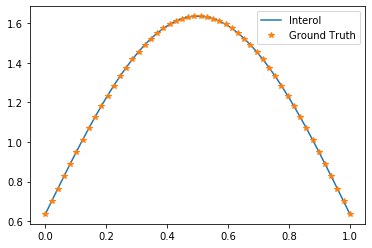

In [26]:
import scipy.interpolate
import matplotlib.pyplot as plt

grid = np.linspace(0, 1, 50)
for i in range(5,50,5):
    vl, f = app(i)
    interp = scipy.interpolate.CubicSpline(vl, f)
    print("узлов -", i, "  среднеквадратичная ошибка =", np.linalg.norm(exact(grid) - interp(grid)))
plt.plot(grid, interp(grid), label="Interol")
plt.plot(grid, exact(grid), '*', label="Ground Truth")
plt.legend()
plt.show()

2. Now use the following formula to calculate the function at points of the same uniform grid.
$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$
Again, compare the interpolation values with the exact solution values, and also with the direct interpolation method.

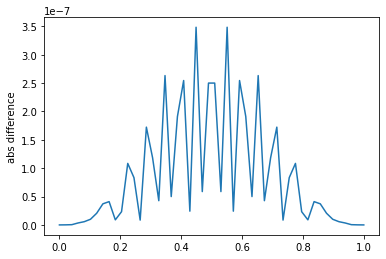

In [28]:
def f3(x,f):
    n = len(f)
    vl, w = sp.roots_sh_legendre(n)
    return np.sin(np.pi*x)+(w/2@f)
    
plt.plot(grid, abs(f3(grid, f)- interp(grid)))
plt.ylabel("abs difference")
plt.show()

Из графика видно, что погрешность интерполяции порядка 10^-7, что не идеально